In [30]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from matplotlib import pyplot as plt

import numpy as np

from PIL import Image

In [3]:
image_df = pd.read_csv('images_index.csv')
image_df['timestamp'] = pd.to_datetime(image_df['timestamp'])

In [4]:
# filter for image['timestamp'] datetime to between 6 am and 10 pm
image_df = image_df[(image_df['timestamp'].dt.hour >= 6) & (image_df['timestamp'].dt.hour <= 22)]

In [5]:
# show first image of the day
image_df.iloc[0]['path']

# load image
img = Image.open(image_df.iloc[0]['path'])

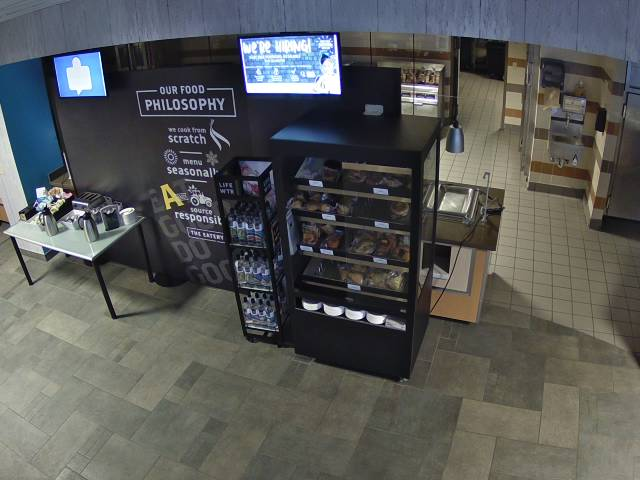

In [6]:
img

In [7]:
image_df

path  \
7711       images/North Haven Dining Hall/1663754415.jpg   
7712      images/Mount Carmel Dining Hall/1663754415.jpg   
7713      images/Mount Carmel Post Office/1663754415.jpg   
7714   images/North Haven Dining Hall Gym/1663754415.jpg   
7715             images/Mount Carmel Exit/1663754415.jpg   
...                                                  ...   
17099      images/Mount Carmel Turnstiles/1663783837.jpg   
17100  images/North Haven Dining Hall Deli/1663783837...   
17101     images/Mount Carmel Post Office/1663783837.jpg   
17102            images/Mount Carmel Exit/1663783837.jpg   
17103  images/Mount Carmel Dining Hall Checkout/16637...   

                                location                 timestamp  
7711             North Haven Dining Hall 2022-09-21 06:00:15-04:00  
7712            Mount Carmel Dining Hall 2022-09-21 06:00:15-04:00  
7713            Mount Carmel Post Office 2022-09-21 06:00:15-04:00  
7714         North Haven Dining Hall Gym 2022-09-21 06:00:15-04:00  
7715                   Mount Carmel Exit 2022-09-21 06:00:15-04:00  
...                                  ...                       ...  
17099            Mount Carmel Turnstiles 2022-09-21 14:10:37-04:00  
17100       North Haven Dining Hall Deli 2022-09-21 14:10:37-04:00  
17101           Mount Carmel Post Office 2022-09-21 14:10:37-04:00  
17102                  Mount Carmel Exit 2022-09-21 14:10:37-04:00  
17103  Mount Carmel Dining Hall Checkout 2022-09-21 14:10:37-04:00  

[9393 rows x 3 columns]

In [8]:
locations = image_df['location'].unique()
locations

array(['North Haven Dining Hall', 'Mount Carmel Dining Hall',
       'Mount Carmel Post Office', 'North Haven Dining Hall Gym',
       'Mount Carmel Exit', 'Mount Carmel Turnstiles',
       'Mount Carmel Dining Hall Checkout', 'Mount Carmel Piazza',
       'North Haven Dining Hall Deli',
       'Mount Carmel Dining Hall Smoothies',
       'North Haven Dining Hall Checkout'], dtype=object)

In [9]:
len(locations)

11

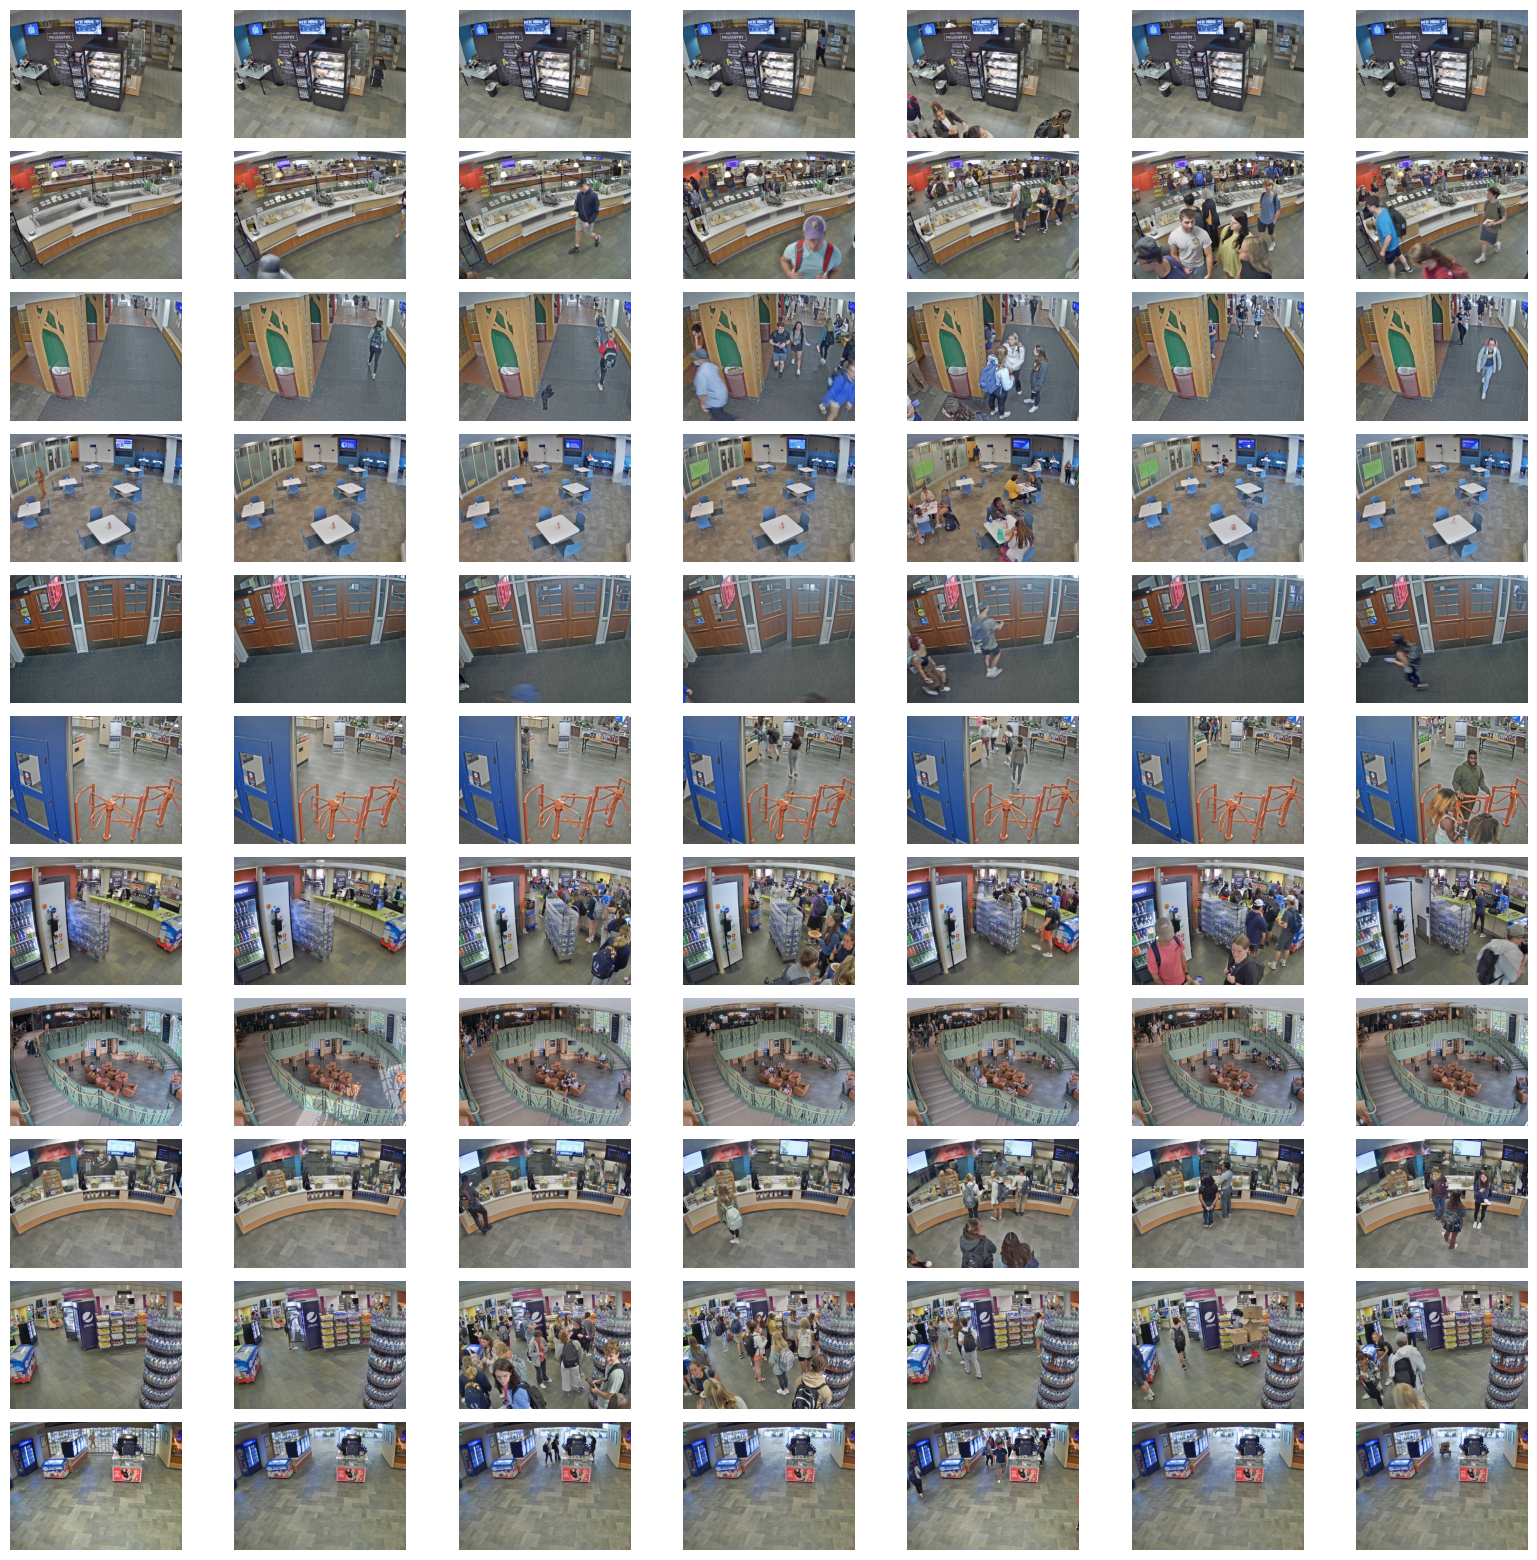

In [50]:
# show an image from each hour of the day from start_hour to end_hour for first num_locs locations
# start_hour = 6
# end_hour = 15
# locations = 11
start_hour = 8
end_hour = 14
num_locs = 11

# no axis labels and titles, little space between images, scrollable
fig, axs = plt.subplots(num_locs, end_hour - start_hour + 1, figsize=(20, 20))
for i, loc in enumerate(locations[:num_locs]):
    for j, hour in enumerate(range(start_hour, end_hour + 1)):
        img = Image.open(image_df[(image_df['location'] == loc) & (image_df['timestamp'].dt.hour == hour)].iloc[0]['path'])
        axs[i, j].imshow(img)
        axs[i, j].axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

In [51]:
locations

array(['North Haven Dining Hall', 'Mount Carmel Dining Hall',
       'Mount Carmel Post Office', 'North Haven Dining Hall Gym',
       'Mount Carmel Exit', 'Mount Carmel Turnstiles',
       'Mount Carmel Dining Hall Checkout', 'Mount Carmel Piazza',
       'North Haven Dining Hall Deli',
       'Mount Carmel Dining Hall Smoothies',
       'North Haven Dining Hall Checkout'], dtype=object)